In [2]:
import pandas as pd

In [8]:
data = pd.read_csv("Dataset/House Price India.csv")

In [13]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [18]:
stats = data["Price"].describe().reset_index()
stats["Price"] = round(stats["Price"],2)

In [21]:
#remove na and duplicate values
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [25]:
import matplotlib.pyplot as plt

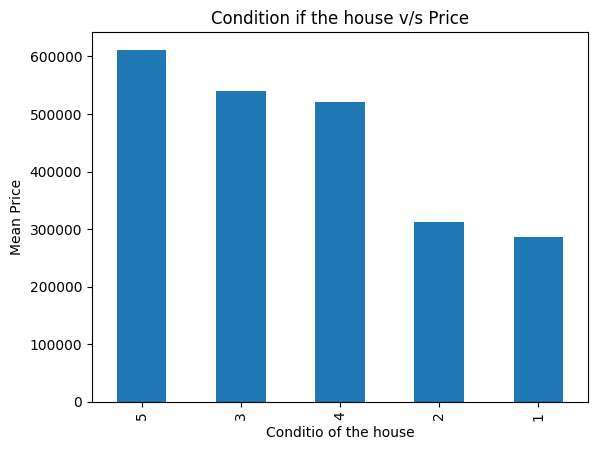

In [29]:
data.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Condition if the house v/s Price")
plt.xlabel("Conditio of the house")
plt.ylabel("Mean Price")
plt.show()


In [33]:
x = data[['number of bedrooms', 'number of bathrooms', 'living area', 'condition of the house', 'Number of schools nearby']]
y = data[["Price"]]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    "criterion" : ["mse", "friedman_mse", "mae"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30, 40, 50],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [44]:
tree_model = DecisionTreeRegressor()

In [45]:
grid_tree = GridSearchCV(estimator= tree_model, param_grid = param_grid)

In [ ]:
grid_tree.fit(x_train, y_train)

In [47]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [48]:
tree_preds = grid_tree.predict(x_test)

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tree_preds)

161614.6832801027

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [52]:
lr.fit(x_train, y_train)

LinearRegression()

In [53]:
predslr = lr.predict(x_test)

In [57]:
mean_absolute_error(y_test, predslr)

165478.7563135454

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [59]:
param_gridrfr = {
    "max_depth" : [5, 10, 15],
    "n_estimators" : [3, 4, 5, 6, 7, 8, 9, 10]
}

In [60]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [61]:
gridrfr.fit(x_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [62]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 4}

In [63]:
rfrprediction = gridrfr.predict(x_test)

In [64]:
mean_absolute_error(y_test, rfrprediction)

158847.23142448213

In [65]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [66]:
import joblib
joblib.dump(gridrfr, "model.pkl")

['model.pkl']

In [67]:
x.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area',
       'condition of the house', 'Number of schools nearby'],
      dtype='object')